### Universidade Federal do Ceará (Centro de Ciências)
#### CK0223 – Mineração de Dados - 2021.2
**Aluno:** **Francisco Luan Rodrigues De Sousa, matrícula - 471459**


**Professor:** **Dr. José Maria**

**---------------------- DETECÇÃO DE OUTLIERS -----------------------**

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon

%matplotlib inline

Importando os dados:

In [20]:
#Dataset do primeiro trabalho de mineração de dados com os dados das quantidades e valores dos projetos que foi scrapitado do site do Ministério da Cultura.
#Com sete variáveis quantitativas. 
df = pd.read_csv('dado01.csv', sep = ';', index_col = [0])
df

,Ano,Quantidade Apresentada,Quantidade Aprovada,Quantidade Apoiada,Vl.Apresentado,Vl. Aprovado,Vl. Apoiado
1,1993,19,10,2,187108599,139692368,212128
2,1994,74,91,7,982281962,1147752976,5337516
3,1995,1378,69,153,7678852585,960432433,416682647
4,1996,3773,2552,624,2130370531,1612596209,1950301044
5,1997,7535,3011,1299,3694960473,1528013048,3308801563
6,1998,6559,3669,1258,3005725978,1590098542,3104510864
7,1999,8281,3346,1221,3403419395,1495505215,3110029754
8,2000,6406,3174,1292,2710416569,1382569112,4610491312
9,2001,8393,2840,1540,3352307615,1359242185,5142648793
10,2002,8969,4476,1527,4125303359,2271888164,4831681678


In [21]:
#Removendo a ultima linha que atrapalharia as análises pois se trata de um somativo total das colunas.
df = df.drop(index = 31)
df

,Ano,Quantidade Apresentada,Quantidade Aprovada,Quantidade Apoiada,Vl.Apresentado,Vl. Aprovado,Vl. Apoiado
1,1993,19,10,2,187108599,139692368,212128
2,1994,74,91,7,982281962,1147752976,5337516
3,1995,1378,69,153,7678852585,960432433,416682647
4,1996,3773,2552,624,2130370531,1612596209,1950301044
5,1997,7535,3011,1299,3694960473,1528013048,3308801563
6,1998,6559,3669,1258,3005725978,1590098542,3104510864
7,1999,8281,3346,1221,3403419395,1495505215,3110029754
8,2000,6406,3174,1292,2710416569,1382569112,4610491312
9,2001,8393,2840,1540,3352307615,1359242185,5142648793
10,2002,8969,4476,1527,4125303359,2271888164,4831681678


Obtendo um histograma para ver como estão distribuindo os valores:

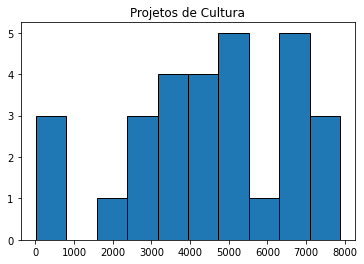

In [22]:
color = ("white")
plt.title('Projetos de Cultura')
plt.hist(df['Quantidade Aprovada'], edgecolor = 'black', linewidth=1)
plt.show()


Fazendo um boxplot para ver os outlers


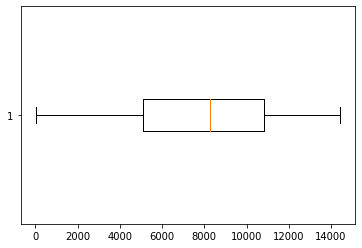

In [23]:
plt.boxplot(df['Quantidade Apresentada'], vert = False)
plt.show()

Calculos estatístico:

In [24]:
Q1 = df['Quantidade Apresentada'].quantile(0.25)
print("Primeiro Quartil:", Q1)


Q3 = df['Quantidade Apresentada'].quantile(0.75)
print("Terceiro Quartil:", Q3)

IQR = Q3-Q1
print("Interquantil:", IQR)

Mediana = df['Quantidade Apresentada'].median()
print("Mediana:", Mediana)

Valor_Min = df['Quantidade Apresentada'].min()
print("Valor Minimo:", Valor_Min)

Valor_Max = df['Quantidade Apresentada'].max()
print("Valor Maximo:", Valor_Max)



Primeiro Quartil: 5108.0
Terceiro Quartil: 10816.0
Interquantil: 5708.0
Mediana: 8281.0
Valor Minimo: 19
Valor Maximo: 14431


Calculamos os valores dos pontos inferiores e superiores:

In [25]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI calculado \n", BI_Calculado)

BS_Calculado = (Q3 - 1.5 * IQR)
print("BS calculado \n", BS_Calculado)





BI calculado 
 -3454.0
BS calculado 
 2254.0


Localizando os Outliers:

In [26]:
localiza_outilers = (df['Quantidade Apresentada'] < BI_Calculado) | (df["Quantidade Apresentada"]> BS_Calculado)
print("\n localizar outilers \n", localiza_outilers)      


 localizar outilers 
 1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
28     True
29     True
30    False
Name: Quantidade Apresentada, dtype: bool


In [27]:
outilers = df[localiza_outilers]
print("\n Lista de Outlers \n", outilers)


 Lista de Outlers 
      Ano  Quantidade Apresentada  Quantidade Aprovada  Quantidade Apoiada  \
4   1996                    3773                 2552                 624   
5   1997                    7535                 3011                1299   
6   1998                    6559                 3669                1258   
7   1999                    8281                 3346                1221   
8   2000                    6406                 3174                1292   
9   2001                    8393                 2840                1540   
10  2002                    8969                 4476                1527   
11  2003                    7163                 4222                1543   
12  2004                    7637                 5304                2042   
13  2005                   12553                 6739                2476   
14  2006                    9766                 6997                2936   
15  2007                   11972                 6877  

Ordenar os Outliers:

In [28]:
outilers_ordenados = outilers.sort_values("Quantidade Apresentada")
outilers_ordenados


,Ano,Quantidade Apresentada,Quantidade Aprovada,Quantidade Apoiada,Vl.Apresentado,Vl. Aprovado,Vl. Apoiado
4,1996,3773,2552,624,2130370531,1612596209,1950301044
28,2019,4134,3821,3321,3722386258,3280169679,1492709770
29,2020,4693,4180,3242,3898419124,3276729877,1497861482
24,2016,5108,4525,2839,5708891015,3914577256,1164729607
26,2018,5957,5514,3249,6590299665,6640934773,1314875870
8,2000,6406,3174,1292,2710416569,1382569112,4610491312
6,1998,6559,3669,1258,3005725978,1590098542,3104510864
11,2003,7163,4222,1543,3901944691,1937670620,4611575901
5,1997,7535,3011,1299,3694960473,1528013048,3308801563
12,2004,7637,5304,2042,5034932459,2536717915,5926055093


Não são outliers:

In [29]:
localiza_sin_out = (df["Quantidade Apresentada"] >= BI_Calculado) & (df["Quantidade Apresentada"] <= BS_Calculado)
sin_outliers = df[localiza_sin_out]
sin_outliers

,Ano,Quantidade Apresentada,Quantidade Aprovada,Quantidade Apoiada,Vl.Apresentado,Vl. Aprovado,Vl. Apoiado
1,1993,19,10,2,187108599,139692368,212128
2,1994,74,91,7,982281962,1147752976,5337516
3,1995,1378,69,153,7678852585,960432433,416682647
30,2021,2200,1866,1846,1481524438,1185515643,6053617475


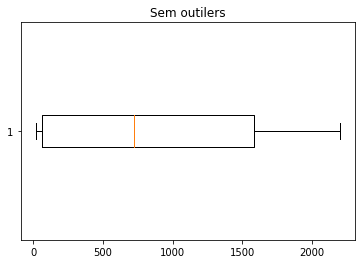

In [30]:
plt.title("Sem outilers")
plt.boxplot(sin_outliers["Quantidade Apresentada"], vert = False)
plt.show()

**Comparando os Boxplot COM e SEM outliers:**

In [31]:
import seaborn as sns


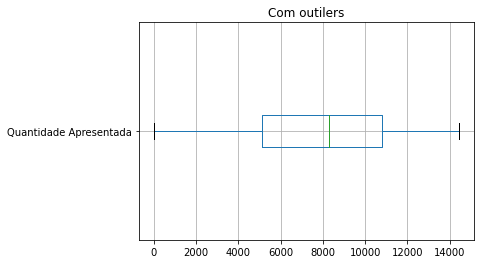

In [32]:
plt.title("Com outilers")
df.boxplot(column="Quantidade Apresentada", vert = False)
plt.show()

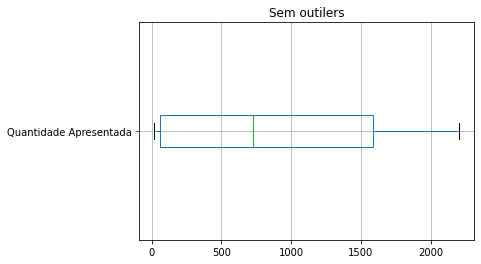

In [33]:
plt.title("Sem outilers")
sin_outliers.boxplot(column="Quantidade Apresentada", vert = False)
plt.show()